# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Loading our data file

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\python\BI Crazy_Monkey Project\crazy_monkey_cleandata.csv')

In [3]:
df.head(3)

,dummy,order_id,parent_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,...,gender,subclass,neck,sleeve,material,product_type,prod_name,created_at,city,state
0,27288,3550739,0,44879,1000,1,34584,19,382,Accessories,...,Unisex,Mobile Covers,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,OnePlus One Mobile Covers,01-01-16 0:07,Mumbai,Maharashtra
1,38337,3550743,0,1627343,1000,1,61354,3,622,Apparel,...,Men,T-Shirts,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,01-01-16 0:11,Mumbai,Maharashtra
2,29144,3550745,0,1221355,1000,1,26898,4,456,Apparel,...,Men,Pyjamas,-1,-1,100% Cotton,Pyjamas,Men's Plain Pyjamas,01-01-16 0:12,Ghaziabad,Uttar Pradesh


# Checking for duplicated data 

In [4]:
df[df.duplicated()].sum()

dummy           0.0
order_id        0.0
parent_id       0.0
user_id         0.0
price           0.0
quantity        0.0
product_id      0.0
size_id         0.0
category_id     0.0
cat_type        0.0
subtype         0.0
gender          0.0
subclass        0.0
neck            0.0
sleeve          0.0
material        0.0
product_type    0.0
prod_name       0.0
created_at      0.0
city            0.0
state           0.0
dtype: float64

# Checking our dataframe 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41726 entries, 0 to 41725
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dummy         41726 non-null  int64 
 1   order_id      41726 non-null  int64 
 2   parent_id     41726 non-null  int64 
 3   user_id       41726 non-null  int64 
 4   price         41726 non-null  int64 
 5   quantity      41726 non-null  int64 
 6   product_id    41726 non-null  int64 
 7   size_id       41726 non-null  int64 
 8   category_id   41726 non-null  int64 
 9   cat_type      40174 non-null  object
 10  subtype       40174 non-null  object
 11  gender        40174 non-null  object
 12  subclass      40174 non-null  object
 13  neck          40174 non-null  object
 14  sleeve        40174 non-null  object
 15  material      40174 non-null  object
 16  product_type  40174 non-null  object
 17  prod_name     41726 non-null  object
 18  created_at    41726 non-null  object
 19  city

# Changing data types

In [6]:
# We see that created_at is a datetime but it is shown as object
# Thus, we must change it to datetime

df['created_at'] =  pd.to_datetime(df['created_at'])

In [7]:
# Checking again -
df.dtypes

dummy                    int64
order_id                 int64
parent_id                int64
user_id                  int64
price                    int64
quantity                 int64
product_id               int64
size_id                  int64
category_id              int64
cat_type                object
subtype                 object
gender                  object
subclass                object
neck                    object
sleeve                  object
material                object
product_type            object
prod_name               object
created_at      datetime64[ns]
city                    object
state                   object
dtype: object

# Checking the shape of our dataset

In [8]:
df.shape

(41726, 21)

# Checking for null values

In [9]:
# Do we have any null values

df.isnull().values.any()

True

In [10]:
# total null values are

df.isnull().sum().sum()

12441

- We see that there are lot of null values in our data

- Also, it can be observed that other than 'NaN', we can also see 'NA' 

In [11]:
# if yes, where are the null values

df.isnull().sum()

dummy              0
order_id           0
parent_id          0
user_id            0
price              0
quantity           0
product_id         0
size_id            0
category_id        0
cat_type        1552
subtype         1552
gender          1552
subclass        1552
neck            1552
sleeve          1552
material        1552
product_type    1552
prod_name          0
created_at         0
city               0
state             25
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df = df.reset_index(drop = True)

In [14]:
# Now --- total null values are

df.isnull().sum().sum()

0

In [15]:
df.isnull().sum()

dummy           0
order_id        0
parent_id       0
user_id         0
price           0
quantity        0
product_id      0
size_id         0
category_id     0
cat_type        0
subtype         0
gender          0
subclass        0
neck            0
sleeve          0
material        0
product_type    0
prod_name       0
created_at      0
city            0
state           0
dtype: int64

# Checking column names

In [16]:
df.columns

Index(['dummy', 'order_id', 'parent_id', 'user_id', 'price', 'quantity',
       'product_id', 'size_id', 'category_id', 'cat_type', 'subtype', 'gender',
       'subclass', 'neck', 'sleeve', 'material', 'product_type', 'prod_name',
       'created_at', 'city', 'state'],
      dtype='object')

# Removing unnecessary columns from the dataframe

In [17]:
df.drop(['dummy', 'parent_id'],axis = 1, inplace=True)

In [18]:
df.shape

(40152, 19)

In [19]:
df.head(3)

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,subclass,neck,sleeve,material,product_type,prod_name,created_at,city,state
0,3550739,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,Mobile Covers,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,OnePlus One Mobile Covers,2016-01-01 00:07:00,Mumbai,Maharashtra
1,3550743,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,T-Shirts,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,2016-01-01 00:11:00,Mumbai,Maharashtra
2,3550745,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,Pyjamas,-1,-1,100% Cotton,Pyjamas,Men's Plain Pyjamas,2016-01-01 00:12:00,Ghaziabad,Uttar Pradesh


# Description of the data in our dataframe

In [20]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
order_id,40152.0,NaN,NaN,NaN,NaT,NaT,3605859.739565,31799.456441,3550739.0,3578326.0,3605692.0,3633352.0,3661041.0
user_id,40152.0,NaN,NaN,NaN,NaT,NaT,1295266.239017,521031.229741,18.0,1078587.0,1602135.0,1653195.0,1689349.0
price,40152.0,NaN,NaN,NaN,NaT,NaT,1000.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0
quantity,40152.0,NaN,NaN,NaN,NaT,NaT,1.0,0.0,1.0,1.0,1.0,1.0,1.0
product_id,40152.0,NaN,NaN,NaN,NaT,NaT,39006.075712,20741.770719,105.0,23273.0,41648.0,54166.0,65188.0
size_id,40152.0,NaN,NaN,NaN,NaT,NaT,5.875747,6.412251,1.0,2.0,3.0,5.0,19.0
category_id,40152.0,NaN,NaN,NaN,NaT,NaT,326.553696,187.996844,88.0,156.0,284.0,526.0,648.0
cat_type,40152,2,Apparel,33536,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subtype,40152,4,Topwear,23488,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,40152,3,Men,24059,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Here , we notice some discrepancies in our data.

- It can be seen that there are 259 unique states in our data

- We also see that there are different type of null values such as 'NA'

In [21]:
# Thus, replcaing 'NA' values with 'NaN' which is easily recognised by pandas.

In [22]:
# df.replace('NA',np.nan)

# -------------------------------------------------------------------------------------------

# Convert all city and state names to proper case in order to bring uniformness and also convert its datatype to string

In [23]:
# This would make it easier to clean the data

In [24]:
# converting values of city column to proper case

df['city'] = df['city'].str.capitalize()

In [25]:
# converting values of state column to proper case

df['state'] = df['state'].str.capitalize()

In [26]:
# This shows the total unique cities that we have in our data before cleaning it

df['city'].nunique()

# we have cleaned more than 100 rows of duplicate data from our dataset using Excel

667

In [27]:
# This shows the total unique states that we have in our data before cleaning it

df['state'].nunique()

171

In [28]:
# Looking at all the city names in ascending order

df.sort_values('city', ascending = True)['city'].unique()

array([' ', 'Abohar', 'Adilabad', 'Adipur', 'Adoni', 'Agartala', 'Agra',
       'Ahmedabad', 'Ahmednagar', 'Airoli', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Alibaug', 'Aligarh', 'Allahabad', 'Alwar',
       'Amalapuram', 'Ambala', 'Ambernath', 'Amravati', 'Amreli',
       'Amritsar', 'Anakapalle', 'Anand', 'Anantapur', 'Ananthapur',
       'Angul', 'Anjuna', 'Ankleshvar', 'Ankleshwar', 'Anuppur', 'Arcot',
       'Asansol', 'Aurangabad', 'Azamgarh', 'Bagalkot', 'Bahadurgarh',
       'Balaghat', 'Balangir', 'Balasore', 'Baleswar', 'Ballia',
       'Banaskantha', 'Banka', 'Bankura', 'Bansthali', 'Banswara',
       'Barabanki', 'Bardhaman', 'Bareilly', 'Bargarh', 'Barmer',
       'Barnala', 'Barwani', 'Bassi pathana', 'Bastar', 'Batala',
       'Bathinda', 'Beawar', 'Begusarai', 'Behror', 'Belgaum', 'Bellary',
       'Bengaluru', 'Bengaluru ', 'Berhampur', 'Betul', 'Bhagalpur',
       'Bhandara', 'Bharatpur', 'Bharuch', 'Bhavnagar', 'Bhayander',
       'Bhilai', 'Bhilwara', 'Bhiwa

# Looking at all the state names in ascending order

In [29]:
df.sort_values('state', ascending = True)['state'].unique()

array([' ', '-', '---', '-select-', '4422275314', '4614192', 'An',
       'Andaman and nicobar islands', 'Andhra pradesh', 'Andhrapradesh',
       'Ap', 'Arunachal pradesh', 'Ashirwad chowk', 'Assam', 'Bihar',
       'C.g.', 'California', 'Chandiagarh', 'Chattisgarh', 'Chattishgarh',
       'Chhattisgarh', 'Chhattishgarh', 'Dadra and nagar haveli', 'Daman',
       'Daman and diu', 'Dl', 'Dubai', 'East singhbhum', 'England',
       'Farwaniya', 'Gj', 'Goa', 'Gujar?t', 'Gujarat', 'Gujarat\r\n',
       'Gujarat, india', 'Gujarati', 'Gujrat', 'Harayana', 'Hary?na',
       'Haryana', 'Haryanaa', 'Hawaii', 'Him?chal pradesh',
       'Himachal pradesh', 'Hr', 'Hyderabad\r\n', 'Il', 'Illinois', 'In',
       'India', 'J&k', 'Jabalpur', 'Jabel ali', 'Jammu and kashmir',
       'Jeddah', 'Jharkhand', 'Ka', 'Karanataka', 'Karmataka',
       'Karn?taka', 'Karnatak', 'Karnataka', 'Karnataka ',
       'Karnataka > bengaluruurban', 'Karnataka india',
       'Karnatakakarnataka', 'Karnatka', 'Karntaka'

In [30]:
df.head(3)

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,subclass,neck,sleeve,material,product_type,prod_name,created_at,city,state
0,3550739,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,Mobile Covers,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,OnePlus One Mobile Covers,2016-01-01 00:07:00,Mumbai,Maharashtra
1,3550743,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,T-Shirts,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,2016-01-01 00:11:00,Mumbai,Maharashtra
2,3550745,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,Pyjamas,-1,-1,100% Cotton,Pyjamas,Men's Plain Pyjamas,2016-01-01 00:12:00,Ghaziabad,Uttar pradesh


# --------------------------------------------------------------------------------------------

# Correcting all the state names in the state column of our dataframe

In [31]:
# here, we are cleaning the state names
# We are removing duplicate data in state column

state_ls = []

for i in df.state:
    # blank state
    if i == ' ':
        state_ls.append(np.nan)
    # Rajasthan
    elif i in ['-','Rj', 'Rajasthan', 'Nrajasthan']:
        state_ls.append('Rajasthan')
    # Maharashtra
    elif i in ['---', '-select-', 'Mah', 'Mah?r?shtra', 'Maharahshtra', 'Maharashta', 'Maharashtatra',
       'Maharashtra', 'Maharashtra\r\n', 'Maharashtra ', 'Maharashtrar', 'Nr- sakinaka metro station',
       'Maharasthra', 'Maharastra', 'Maharastra ', 'Maharshtra', 'Navi mumbai', 'Mumbai',
       'Maharstra', 'Mahrashtra', 'Mh', 'Mumbai', 'Mumbai', 'Maharashtra', 'Shardashram school']:
        state_ls.append('Maharashtra')
    # Tamil Nadu
    elif i in ['4422275314', 'Tamil n?du', 'Tamil nacdu', 'Tamil nadu', 'Tamil nadut',
       'Tamilnadu', 'Tamilnadu', 'Tn', 'Tamilnadu ']:
        state_ls.append('Tamil Nadu')
    # Chandigarh
    elif i in ['4614192', 'Chandigargh', 'Chandigarh', 'Ut']:
        state_ls.append('Chandigarh')
    # Gujarat
    elif i in ['An', 'Gujar?t', 'Gujarat', 'Gujarat\r\n', 'Gujarat, india', 'Gujarati', 'Gujarat, india'
       'Gujrat', 'Gujarat', 'Gj', 'Gujrat']:
        state_ls.append('Gujarat')
    # Andaman and Nicobar Islands
    elif i in ['Andaman and nicobar islands']: #26154,26155 - hyderabad(andaman&nicobar)
        state_ls.append('Andaman and Nicobar islands')
    # Andhra Pradesh
    elif i in ['Andhra pradesh', 'Andhrapradesh', 'Vishakaptnam',
       'Ap', 'Andhra Pradesh']:
        state_ls.append('Andhra Pradesh')
    # Arunachal Pradesh
    elif i in ['Arunachal pradesh']:
        state_ls.append('Arunachal Pradesh')
    # Delhi
    elif i in ['Ashirwad chowk', 'Delhi', 'Dl', 'Nct-delhi', 'New delhi', 'In']:
        state_ls.append('Delhi')
    # Chhattisgarh
    elif i in ['Chattisgarh',
       'Chattishgarh', 'Chhattisgarh', 'Chhattishgarh', 'C.g.']:
        state_ls.append('Chhattisgarh')
    # Daman and Diu
    elif i in ['Daman', 'Daman and diu', 'Daman and Diu']:
        state_ls.append('Daman and Diu')
    # Jharkhand
    elif i in ['East singhbhum', 'Jharkhand']:
        state_ls.append('Jharkhand')
    # Haryana
    elif i in ['Harayana', 'Hary?na', 'Haryana', 'Haryanaa', 'Hr', 'Select state']:
        state_ls.append('Haryana')
    # Himachal Pradesh
    elif i in ['Him?chal pradesh', 'Himachal pradesh']:
        state_ls.append('Himachal Pradesh')
    # Telangana
    elif i in ['Hyderabad\r\n', 'Near sbh bank', 'Telangana', 'Telangana ', 'Telegana', 'S.r.nagar',
       'Telengana']:
        state_ls.append('Telangana')
    # Illinois, USA
    elif i in ['Il', 'Illinois']:
        state_ls.append('Illinois')
    # Madhya Pradesh
    elif i in ['Jabalpur', 'Madhya pradesh', 'Madhya Pradesh', 'Mp', 'Mashay pradesh', 'M.p.']:
        state_ls.append('Madhya Pradesh')
    # 'Jammu and Kashmir'
    elif i in ['J&k', 'Jammu and Kashmir', 'Jammu and kashmir']:
        state_ls.append('Jammu and Kashmir')
    # Bihar
    elif i in ['Near sujata garh, bakraur', 'Bihar']:
        state_ls.append('Bihar')
    # Odisha
    elif i in ['Odhisa', 'Odisha', 'Odisha ', 'Odissa', 'Orissa', 'Orrisa']:
        state_ls.append('Odisha')
    # karnataka
    elif i in ['Please select region, state or province', 'Ka', 'Karanataka', 'Marnamikatta circle',
       'Karmataka', 'Karn?taka', 'Karnatak', 'Karnataka', 'Karnataka ', 'Territory not listed',
       'Karnataka > bangalore urban', 'Karnataka india',
       'Karnatakakarnataka', 'Karnatka', 'Karntaka', 'Karnataka']:
        state_ls.append('Karnataka')
    # Uttar Pradesh
    elif i in ['Lucknow', 'Uttar Pradesh', 'U p', 'U.p', 'Up', 'Uttarpradesh',
       'Utter pradesh', 'Uttar pradesh', 'Uttar pradesh ', 'Uttar pradesh pradesh',
       'Uttar pradrsh', 'Utter pradesh']:
        state_ls.append('Uttar Pradesh')
    # New York
    elif i in ['Sdfadfa', 'New York', 'New york']:
        state_ls.append('New York')
    # Uttarakhand
    elif i in ['Select your state or province', 'Uttarakhand', 'Uttarakhand ', 'Uttrakhand',
       'Uttarakhandarakhand', 'Uttaranchal']:
        state_ls.append('Uttarakhand')
    # Western Australia
    elif i in ['Wa']:
        state_ls.append('Western Australia')
    # West Bengal
    elif i in ['West bengal']:
        state_ls.append('West Bengal')
    # Puducherry
    elif i in ['Puducherry', 'Pondicherry', 'Pondichery']:
        state_ls.append('Puducherry')
    else:
        state_ls.append(i)
        
        
# thus correcting the state names in the state column -
df['state'] = state_ls

In [32]:
df['state'].nunique()

66

In [33]:
df['state'].unique()

array(['Maharashtra', 'Uttar Pradesh', 'Andhra Pradesh', 'Haryana',
       'Delhi', 'Karnataka', 'Madhya Pradesh', 'West Bengal', 'Jharkhand',
       'Punjab', 'Tamil Nadu', 'Gujarat', 'Odisha', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Dadra and nagar haveli', 'Chandiagarh', 'Assam',
       'Lagos', 'Jammu and Kashmir', 'Telangana', 'Kerala', 'Goa',
       'Himachal Pradesh', 'Chhattisgarh', 'Tripura', 'Puducherry',
       'Illinois', 'Dubai', 'Meghalaya', 'State', 'Nct-new delhi',
       'Daman and Diu', 'Arunachal Pradesh', 'India', 'Sikkim',
       'Chandigarh', 'New York', 'Select one',
       'Karnataka > bengaluruurban', 'Outside united states', 'Farwaniya',
       'Nagaland', 'M', 'Mizoram', 'None', nan,
       'Andaman and Nicobar islands', 'Please select...',
       'Western Australia', 'Manipur', 'England', 'Jabel ali', 'Kenya',
       'Type a choice below ...', 'Hawaii', 'Ontario', 'South australia',
       'Queensland', 'London', 'Nt8nnn8b', 'California', 'Newjersey',
 

In [34]:
# Creating a new dataframe as India_df which consists of data where state is named as India, None, M, Select One etc

India_df = df[(df['state'] == 'India') | (df['state'] == 'M') | (df['state'] == 'State') | (df['state'] == 'Select one') | (df['state'] == 'None') | (df['state'] == 'Type a choice below ...') | (df['state'] == 'nan') | (df['state'] == 'Outside united states') | (df['state'] == 'Nt8nnn8b') | (df['state'] == 'Please select...')]

In [35]:
# Here we are correcting state names based on city names in India_df dataframe where states were names as India -->

list1 = [] # this is a list for state where name is 'Type a choice below ...', 

for i in India_df.city:
    # Kerala
    if i == 'Edapally':
        list1.append('Kerala')
    # Andhra Pradesh
    elif i == 'Kurnool':
        list1.append('Andhra Pradesh')
    # Maharashtra
    elif i == 'Mumbai' or i == 'Alibaug' or i == 'Pune':
        list1.append('Maharashtra')
    # Delhi
    elif i == 'New delhi':
        list1.append('Delhi')
    # Gujarat
    elif i == 'Surat':
        list1.append('Gujarat')
    # Tamil Nadu
    elif i == 'Coimbatore':
        list1.append('Tamil Nadu')
    # Karnataka
    elif i == 'Bangalore' or i == 'Tumakuru':
        list1.append('Karnataka')
    # West Bengal
    elif i == 'Calcutta, west bengal.india':
        list1.append('West Bengal')
    # Haryana
    elif i == 'Faridabad' or i == 'Gurgaon, haryana':
        list1.append('Haryana')
    # Jharkhand
    elif i == 'Ranchi':
        list1.append('Jharkhand')
    # Telangana
    elif i == 'Telangana':
        list1.append('Telangana')
    # Rajasthan
    elif i == 'Jodhpur' or i == 'Jaipur':
        list1.append('Rajasthan')
    # Uttar Pradesh
    elif i == 'Kanpur' or i == 'Ghaziabad' or i == 'Gautam budha nagar' or i == 'Noida':
        list1.append('Uttar Pradesh')
    # Nagaland
    elif i == 'Dimapur':
        list1.append('Nagaland')
    # Madhya Pradesh
    elif i == 'Indore':
        list1.append('Madhya Pradesh')
    # Madhya Pradesh
    elif i == 'Raipur':
        list1.append('Chhattisgarh')        
    else:
        list1.append(i)
    
India_df['state'] = list1

In [36]:
# Shape of India_df dataframe

India_df.shape

(44, 19)

In [37]:
# Now, let's upload our correct state data to our original dataframe 'df'  ---->

i = 0

for row in India_df.index:
    if i < India_df.shape[0]:
        if India_df[['city','state']].iloc[i][0] == df['city'][row]:
            df['state'][row] = India_df[['city', 'state']].iloc[i][1]
    i+=1

In [38]:
# Thus, now we have a reduced entry in our state  column of df dataframe

df['state'].nunique()

63

In [39]:
df['state'].unique()

array(['Maharashtra', 'Uttar Pradesh', 'Andhra Pradesh', 'Haryana',
       'Delhi', 'Karnataka', 'Madhya Pradesh', 'West Bengal', 'Jharkhand',
       'Punjab', 'Tamil Nadu', 'Gujarat', 'Odisha', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Dadra and nagar haveli', 'Chandiagarh', 'Assam',
       'Lagos', 'Jammu and Kashmir', 'Telangana', 'Kerala', 'Goa',
       'Himachal Pradesh', 'Chhattisgarh', 'Tripura', 'Puducherry',
       'Illinois', 'Dubai', 'Meghalaya', 'Nct-new delhi', 'Daman and Diu',
       'Arunachal Pradesh', 'Sikkim', 'Chandigarh', 'New York',
       'Karnataka > bengaluruurban', 'Offenbach am mian', 'Farwaniya',
       'Nagaland', 'H', 'Mizoram', nan, 'Andaman and Nicobar islands',
       'Western Australia', 'Manipur', 'England', 'Jabel ali', 'Kenya',
       'Hawaii', 'Bengaluru', 'Ontario', 'South australia', 'Queensland',
       'London', 'Tntyg8nu', 'California', 'Newjersey',
       'Gurugram, haryana', 'Jeddah', 'Kolkata', 'Selangor', 'Singapore'],
      dtype=object

# ---------------------------------------------------------------------------------------------

# Let's create a new column 'country' in our dataframe

In [40]:
country_ls = []

for j in df.state:
    if i is not None:
        country_ls.append('India')
        

df['country'] = country_ls

# For now, we are entering India as a country everywhere
# later, we can fix this and enter country name as per region or state

In [41]:
# Creating a new dataframe as India_df which consists of data where state is named as India, None, M, Select One etc

India_df2 = df[(df['state'] == 'Newjersey') | (df['state'] == 'California') | (df['state'] == 'Hawaii') | (df['state'] == 'Illinois') | (df['state'] == 'New York') | (df['state'] == 'Offenbach am mian') | (df['state'] == 'England') | (df['state'] == 'London') | (df['state'] == 'Jeddah') | (df['state'] == 'Selangor') | (df['state'] == 'Singapore') | (df['state'] == 'South australia') | (df['state'] == 'Queensland') | (df['state'] == 'Western Australia') | (df['state'] == 'Kenya') | (df['state'] == 'Ontario') | (df['state'] == 'Farwaniya') | (df['state'] == 'Lagos') | (df['state'] == 'Jabel ali') | (df['state'] == 'Dubai')]

In [42]:
# Here we are correcting Country names based on state names in India_df dataframe -->

list2 = [] # this is a list for country where state name is not in India

for i in India_df2.state:
    # New Jersey
    if i == 'Newjersey' or i == 'California' or i == 'Hawaii' or i == 'Illinois' or i == 'New York':
        list2.append('United States of America')
    # Germany
    elif i == 'Offenbach am mian':
        list2.append('Germany')
    # England
    elif i == 'England' or i == 'London':
        list2.append('United Kingdom')
    # Saudi Arabia
    elif i == 'Jeddah':
        list2.append('Saudi Arabia')
    # Malaysia
    elif i == 'Selangor':
        list2.append('Malaysia')
    # Singapore
    elif i == 'Singapore':
        list2.append('Singapore')
    # Australia
    elif i == 'South australia' or i == 'Queensland' or i == 'Western Australia':
        list2.append('Australia')
    # Kenya
    elif i == 'Kenya':
        list2.append('Kenya')
    # Canada
    elif i == 'Ontario':
        list2.append('Canada')
    # Kuwait
    elif i == 'Farwaniya':
        list2.append('Kuwait')
    # Nigeria
    elif i == 'Lagos':
        list2.append('Nigeria')
    # Saudi Arabia
    elif i == 'Jabel ali':
        list2.append('Saudi Arabia')
    # Dubai
    elif i == 'Dubai':
        list2.append('United Arab emirated')
    else:
        list2.append('India')
    
India_df2['country'] = list2

In [43]:
# Now, let's upload our correct Country data to our original dataframe 'df'  ---->

i = 0

for row in India_df2.index:
    if i < India_df2.shape[0]:
        if India_df2[['state','country']].iloc[i][0] == df['state'][row]:
            df['country'][row] = India_df2[['state', 'country']].iloc[i][1]
    i+=1

In [44]:
# Now we have 13 unique countries

df['country'].nunique()

13

In [45]:
# These are the unique countries 

df['country'].unique()

array(['India', 'Nigeria', 'United States of America',
       'United Arab emirated', 'Germany', 'Kuwait', 'Australia',
       'United Kingdom', 'Saudi Arabia', 'Kenya', 'Canada', 'Malaysia',
       'Singapore'], dtype=object)

# ---------------------------------------------------------------------------------------------

# Checking for unique values in columns:

In [46]:
# Unique values of gender

df['gender'].unique()

array(['Unisex', 'Men', 'Women'], dtype=object)

In [47]:
# Unique values of Category 

df['cat_type'].unique()

array(['Accessories', 'Apparel'], dtype=object)

In [48]:
# Unique values of Sub-Category 
df['subtype'].unique()

array(['Mobile Covers', 'Topwear', 'Bottomwear', 'Gift Cards'],
      dtype=object)

In [49]:
# Unique values of Subclass

df['subclass'].unique()

array(['Mobile Covers', 'T-Shirts', 'Pyjamas', 'Boxers', 'Zipper',
       'Sweatshirts', 'Vests', 'Shorts', 'Crop', 'Shirts', 'Tank Tops',
       'Bomber', 'Gift Cards', 'Joggers'], dtype=object)

In [50]:
# Unique values of neck

df['neck'].unique()

array(['-1', 'Round Neck', 'Scoop Neck', 'Hood', 'Collared Neck',
       'Bomber Neck', 'V Neck'], dtype=object)

In [51]:
# Unique values of sleeve

df['sleeve'].unique()

array(['-1', 'Full', '3/4th', 'Half', 'Sleeveless'], dtype=object)

In [52]:
# Unique values of material

df['material'].unique()

array(['Polycarbonate Hard Plastic', '100% Cotton', '-1'], dtype=object)

In [53]:
# Unique values of product_type

df['product_type'].unique()

array(['Mobile Covers', 'T-Shirts', 'Pyjamas', 'Boxers', 'Zipper',
       'Sweatshirts', 'Vests', 'Shorts', 'Crop', 'Shirts', 'Tank Tops',
       'Bomber', 'Gift Cards', 'Joggers'], dtype=object)

In [54]:
df.head(2)

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,subclass,neck,sleeve,material,product_type,prod_name,created_at,city,state,country
0,3550739,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,Mobile Covers,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,OnePlus One Mobile Covers,2016-01-01 00:07:00,Mumbai,Maharashtra,India
1,3550743,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,T-Shirts,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,2016-01-01 00:11:00,Mumbai,Maharashtra,India


In [55]:
# --------------------------------------------------------------------------------------------------------

# To count days from a given date

In [56]:
# As we see that our data has max date of January 30, 2016.

df['created_at'].max()

Timestamp('2016-01-30 23:59:00')

In [57]:
# As we see that our data has max date of January 30, 2016.
# Lets assign a date of April 1, 2016 using which we would calculate the recency of our customer

max_date = '04-01-2016' #MM-DD-YYYY format
max_date = pd.to_datetime(max_date)

#pd.to_datetime(df['lasttransactiondate'], errors = 'ignore').rsub(pd.Timestamp('now').floor('d')).dt.days

In [58]:
# Writing the days since last order of a customer to our original dataframe 'df'

df['Days_since_last_order'] = pd.to_datetime(df['created_at'], errors = 'ignore').rsub(max_date).dt.days

In [59]:
# Changing datatype of Days_since_last_order column in 'df' dataframe---

df['Days_since_last_order'] = df['Days_since_last_order'].astype('int64')

In [60]:
# Calculating minimum days since the last order 

df['Days_since_last_order'].min()

61

In [61]:
df.head(3)

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,neck,sleeve,material,product_type,prod_name,created_at,city,state,country,Days_since_last_order
0,3550739,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,...,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,OnePlus One Mobile Covers,2016-01-01 00:07:00,Mumbai,Maharashtra,India,90
1,3550743,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,...,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,2016-01-01 00:11:00,Mumbai,Maharashtra,India,90
2,3550745,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,...,-1,-1,100% Cotton,Pyjamas,Men's Plain Pyjamas,2016-01-01 00:12:00,Ghaziabad,Uttar Pradesh,India,90


# Creating a new column to show the day of the week

In [62]:
df['day_of_week'] = df['created_at'].dt.day_name()

# Creating a new column to show the day of the month

In [63]:
df['day_of_month'] = df['created_at'].dt.day.tolist()

# Creating a new column to show the time of the day

In [64]:
df['time_of_day'] = df['created_at'].dt.time

# Creating a new column to show the hour of the day

In [65]:
df['hour_of_day'] = df['created_at'].dt.hour

In [66]:
df.head()

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,prod_name,created_at,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day
0,3550739,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,...,OnePlus One Mobile Covers,2016-01-01 00:07:00,Mumbai,Maharashtra,India,90,Friday,1,00:07:00,0
1,3550743,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,...,Men's Plain Henley Fullsleeve T-Shirts,2016-01-01 00:11:00,Mumbai,Maharashtra,India,90,Friday,1,00:11:00,0
2,3550745,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,...,Men's Plain Pyjamas,2016-01-01 00:12:00,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:12:00,0
3,3550747,1221355,1000,1,41284,2,200,Apparel,Topwear,Men,...,Men's Plain Full Sleeve T-Shirts,2016-01-01 00:13:00,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0
4,3550749,1221355,1000,1,53238,2,570,Apparel,Topwear,Men,...,Men's Plain Sports Trim Fullsleeve T-Shirt,2016-01-01 00:13:00,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0


# -----------------------------------------------------------------------------------------------

# Recency, Frequency and Monetary Value

In [67]:
df.groupby('user_id')['price'].sum().nlargest()

user_id
1654301    108000
1653731     66000
1682559     34000
1675049     29000
1635961     21000
Name: price, dtype: int64

In [68]:
df[df['user_id'] == 1654301]['quantity'].sum()

108

In [69]:
# Calculating total quantity bought by customer till date

df['total_quantity'] = df.groupby('user_id', sort=False)['quantity'].transform('sum')

In [70]:
# Calculating total expenditure values as per user_id

df['total_spends'] = df.groupby('user_id', sort=False)['price'].transform('sum')

In [71]:
df.head(2)

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day,total_quantity,total_spends
0,3550739,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,...,Mumbai,Maharashtra,India,90,Friday,1,00:07:00,0,2,2000
1,3550743,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,...,Mumbai,Maharashtra,India,90,Friday,1,00:11:00,0,1,1000


# Based on Receny: 

In [72]:
recent_cus = df.loc[df['Days_since_last_order'] == df['Days_since_last_order'].min()]
recent_cus

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day,total_quantity,total_spends
38822,3657385,1687327,1000,1,41288,2,134,Apparel,Topwear,Men,...,Nagpur,Maharashtra,India,61,Saturday,30,00:01:00,0,3,3000
38823,3657387,1687327,1000,1,41492,2,134,Apparel,Topwear,Men,...,Nagpur,Maharashtra,India,61,Saturday,30,00:01:00,0,3,3000
38824,3657389,1687327,1000,1,53780,2,134,Apparel,Topwear,Men,...,Nagpur,Maharashtra,India,61,Saturday,30,00:01:00,0,3,3000
38825,3657391,1208027,1000,1,50327,3,134,Apparel,Topwear,Men,...,Thane,Maharashtra,India,61,Saturday,30,00:02:00,0,2,2000
38826,3657393,1208027,1000,1,61354,3,622,Apparel,Topwear,Men,...,Thane,Maharashtra,India,61,Saturday,30,00:02:00,0,2,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40147,3661031,1689335,1000,1,24124,19,410,Accessories,Mobile Covers,Unisex,...,Bhopal,Madhya Pradesh,India,61,Saturday,30,23:55:00,23,2,2000
40148,3661033,1689335,1000,1,24164,19,410,Accessories,Mobile Covers,Unisex,...,Bhopal,Madhya Pradesh,India,61,Saturday,30,23:56:00,23,2,2000
40149,3661037,1456719,1000,1,26550,2,348,Apparel,Topwear,Women,...,Bengaluru,Karnataka,India,61,Saturday,30,23:58:00,23,1,1000
40150,3661039,1686593,1000,1,64826,11,352,Apparel,Topwear,Women,...,Bhubaneswar,Odisha,India,61,Saturday,30,23:59:00,23,1,1000


# Based on Frequency: 

In [73]:
# Mean of total_quantity

df['total_quantity'].mean()

3.4002291293086273

In [74]:
# Customers who are buying items frequently must have ordered over mean value 

frequent_cus = df.loc[df['total_quantity'] > df['total_quantity'].mean()]
frequent_cus

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day,total_quantity,total_spends
2,3550745,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:12:00,0,6,6000
3,3550747,1221355,1000,1,41284,2,200,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
4,3550749,1221355,1000,1,53238,2,570,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
5,3550751,1221355,1000,1,53754,2,572,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
6,3550753,1221355,1000,1,53988,2,570,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40132,3660993,535623,1000,1,9618,5,172,Apparel,Topwear,Women,...,Mumbai,Maharashtra,India,61,Saturday,30,23:48:00,23,4,4000
40136,3661003,535623,1000,1,39926,5,492,Apparel,Bottomwear,Women,...,Mumbai,Maharashtra,India,61,Saturday,30,23:49:00,23,4,4000
40141,3661019,1565167,1000,1,53188,11,512,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000
40142,3661021,1565167,1000,1,58050,11,512,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000


# Based on Monetary value: 

In [75]:
# Mean value of total spends

df['total_spends'].mean()

3400.2291293086273

In [76]:
# Customers who are spending over mean value of our total spends are high monetary value customers

monetary_cus = df.loc[df['total_spends'] > df['total_spends'].mean()]
monetary_cus

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day,total_quantity,total_spends
2,3550745,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:12:00,0,6,6000
3,3550747,1221355,1000,1,41284,2,200,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
4,3550749,1221355,1000,1,53238,2,570,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
5,3550751,1221355,1000,1,53754,2,572,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
6,3550753,1221355,1000,1,53988,2,570,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40132,3660993,535623,1000,1,9618,5,172,Apparel,Topwear,Women,...,Mumbai,Maharashtra,India,61,Saturday,30,23:48:00,23,4,4000
40136,3661003,535623,1000,1,39926,5,492,Apparel,Bottomwear,Women,...,Mumbai,Maharashtra,India,61,Saturday,30,23:49:00,23,4,4000
40141,3661019,1565167,1000,1,53188,11,512,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000
40142,3661021,1565167,1000,1,58050,11,512,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000


# Based on R.F.M. 

In [77]:
# Customers who are spent and bought above mean values and have been recent buyers

# Recency should be low means days since the last order should be low
# Frequency should be high means total quantity ordered should be high
# Monetary value should be high means total spends should be high

rfm_cus = df.loc[(df['Days_since_last_order'] == df['Days_since_last_order'].min()) & (df['total_quantity'] > df['total_quantity'].mean()) & (df['total_spends'] > df['total_spends'].mean())]
rfm_cus

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day,total_quantity,total_spends
38865,3657497,668325,1000,1,42882,3,338,Apparel,Topwear,Men,...,Raigad(mh),Maharashtra,India,61,Saturday,30,00:53:00,0,5,5000
38867,3657501,668325,1000,1,42898,3,338,Apparel,Topwear,Men,...,Raigad(mh),Maharashtra,India,61,Saturday,30,00:54:00,0,5,5000
38868,3657503,668325,1000,1,53836,3,134,Apparel,Topwear,Men,...,Raigad(mh),Maharashtra,India,61,Saturday,30,00:54:00,0,5,5000
38869,3657505,668325,1000,1,59340,3,622,Apparel,Topwear,Men,...,Raigad(mh),Maharashtra,India,61,Saturday,30,00:54:00,0,5,5000
38870,3657507,668325,1000,1,62598,3,638,Apparel,Bottomwear,Men,...,Raigad(mh),Maharashtra,India,61,Saturday,30,00:54:00,0,5,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40132,3660993,535623,1000,1,9618,5,172,Apparel,Topwear,Women,...,Mumbai,Maharashtra,India,61,Saturday,30,23:48:00,23,4,4000
40136,3661003,535623,1000,1,39926,5,492,Apparel,Bottomwear,Women,...,Mumbai,Maharashtra,India,61,Saturday,30,23:49:00,23,4,4000
40141,3661019,1565167,1000,1,53188,11,512,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000
40142,3661021,1565167,1000,1,58050,11,512,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000


# ------------------------------------------------------------------------------------------------------------

# Creating 2 new dataframes called 'new_cust_df' (for our new customers)  and 'old_cust_df'  (for our old customers)

In [78]:
new_cust_df = df.loc[df['total_quantity'] == 1]

In [79]:
old_cust_df = df.loc[df['total_quantity'] > 1]

# Old Customers:

In [80]:
old_cust_df

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day,total_quantity,total_spends
0,3550739,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,...,Mumbai,Maharashtra,India,90,Friday,1,00:07:00,0,2,2000
2,3550745,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:12:00,0,6,6000
3,3550747,1221355,1000,1,41284,2,200,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
4,3550749,1221355,1000,1,53238,2,570,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
5,3550751,1221355,1000,1,53754,2,572,Apparel,Topwear,Men,...,Ghaziabad,Uttar Pradesh,India,90,Friday,1,00:13:00,0,6,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40142,3661021,1565167,1000,1,58050,11,512,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000
40143,3661023,1565167,1000,1,61338,11,632,Apparel,Topwear,Women,...,Dehradun,Uttarakhand,India,61,Saturday,30,23:53:00,23,5,5000
40144,3661025,1689349,1000,1,62562,2,172,Apparel,Topwear,Women,...,Bikaner,Rajasthan,India,61,Saturday,30,23:53:00,23,2,2000
40147,3661031,1689335,1000,1,24124,19,410,Accessories,Mobile Covers,Unisex,...,Bhopal,Madhya Pradesh,India,61,Saturday,30,23:55:00,23,2,2000


# New Customers:

In [81]:
new_cust_df

,order_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,...,city,state,country,Days_since_last_order,day_of_week,day_of_month,time_of_day,hour_of_day,total_quantity,total_spends
1,3550743,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,...,Mumbai,Maharashtra,India,90,Friday,1,00:11:00,0,1,1000
12,3550769,869375,1000,1,938,1,122,Apparel,Bottomwear,Women,...,New delhi,Delhi,India,90,Friday,1,00:27:00,0,1,1000
16,3550779,1037635,1000,1,5378,19,224,Accessories,Mobile Covers,Unisex,...,Katni,Madhya Pradesh,India,90,Friday,1,00:31:00,0,1,1000
17,3550783,1627365,1000,1,26280,19,422,Accessories,Mobile Covers,Unisex,...,Mumbai,Maharashtra,India,90,Friday,1,00:40:00,0,1,1000
20,3550791,1626037,1000,1,57490,2,156,Apparel,Bottomwear,Men,...,Mumbai,Maharashtra,India,90,Friday,1,00:48:00,0,1,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40145,3661027,60634,1000,1,53236,4,570,Apparel,Topwear,Men,...,Hyderabad,Andhra Pradesh,India,61,Saturday,30,23:55:00,23,1,1000
40146,3661029,1687537,1000,1,54188,3,134,Apparel,Topwear,Men,...,Patna,Bihar,India,61,Saturday,30,23:55:00,23,1,1000
40149,3661037,1456719,1000,1,26550,2,348,Apparel,Topwear,Women,...,Bengaluru,Karnataka,India,61,Saturday,30,23:58:00,23,1,1000
40150,3661039,1686593,1000,1,64826,11,352,Apparel,Topwear,Women,...,Bhubaneswar,Odisha,India,61,Saturday,30,23:59:00,23,1,1000


# ------------------------------------------------------------------------------------------------

# Find what the old and new customers are buying, at what time they are buying, and at what day of the month they are buying?

<AxesSubplot:title={'center':'New Customers & Sub-Categories'}, xlabel='subtype'>

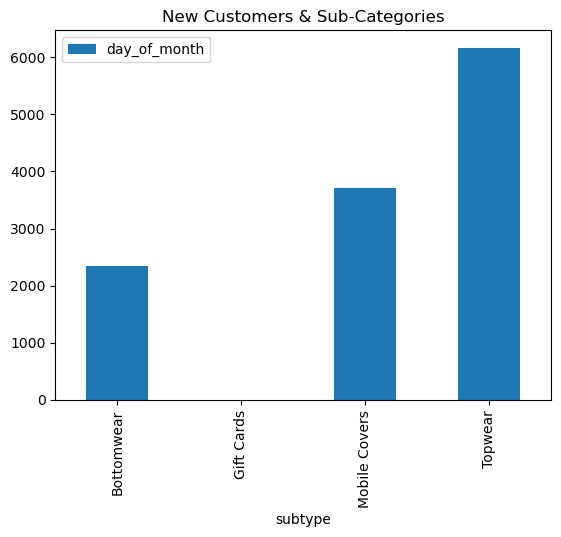

In [82]:
# Topwear and mobile chargers are the favorite sub-category of our new customers

new_cust_df[['subtype', 'day_of_month']].groupby('subtype').count().plot.bar(title='New Customers & Sub-Categories')

<AxesSubplot:title={'center':'New Customers & Sub-Categories & Day of month'}, xlabel='day_of_month'>

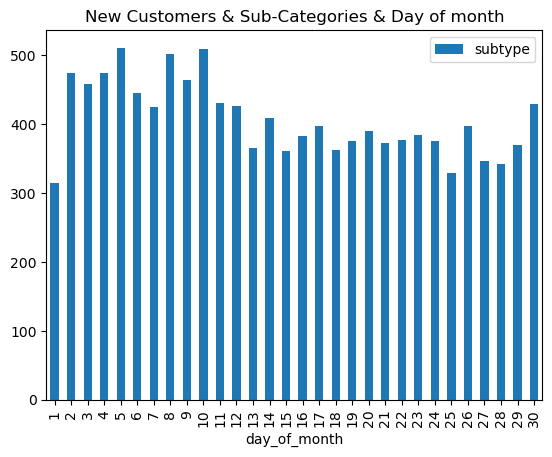

In [83]:
# New customers tend to buy more within the first 10 days of the month

new_cust_df[['subtype', 'day_of_month']].groupby('day_of_month').count().plot.bar(title='New Customers & Sub-Categories & Day of month')

<AxesSubplot:title={'center':'New Customers & Hour of the day'}, xlabel='hour_of_day'>

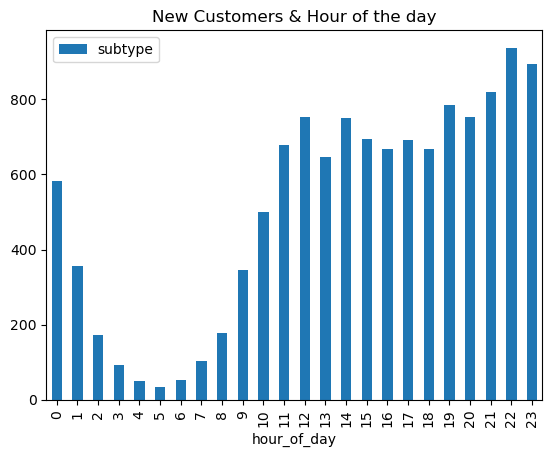

In [84]:
# Topwear and mobile chargers are the favorite sub-category of our new customers

new_cust_df[['subtype', 'hour_of_day']].groupby('hour_of_day').count().plot.bar(title='New Customers & Hour of the day')

# ------------------------------------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Old Customers & Sub-Categories'}, xlabel='subtype'>

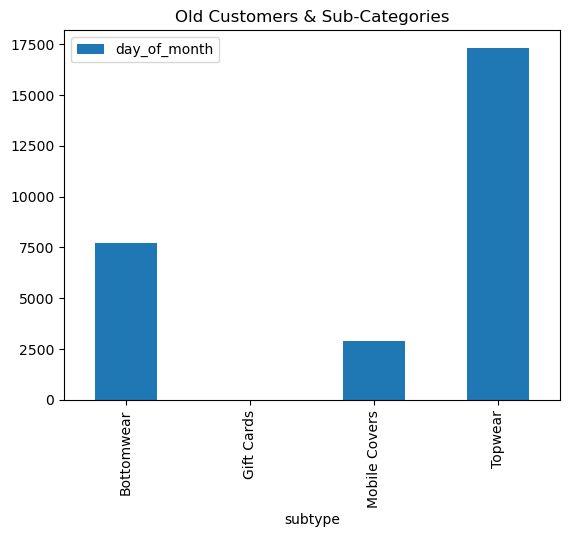

In [85]:
# Topwear and Bottomwear are the favorite sub-category of our new customer

old_cust_df[['subtype', 'day_of_month']].groupby('subtype').count().plot.bar(title='Old Customers & Sub-Categories')

<AxesSubplot:title={'center':'New Customers & Sub-Categories & Day of month'}, xlabel='day_of_month'>

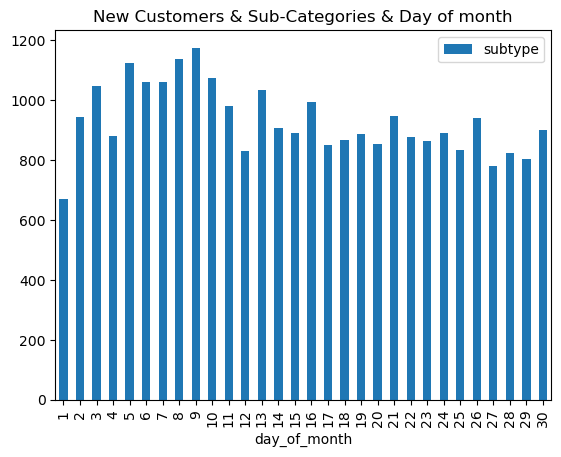

In [86]:
# Old customers tend to buy more within the 5 to 10 days of the start of the month

old_cust_df[['subtype', 'day_of_month']].groupby('day_of_month').count().plot.bar(title='New Customers & Sub-Categories & Day of month')

<AxesSubplot:title={'center':'Old Customers & Hour of the day'}, xlabel='hour_of_day'>

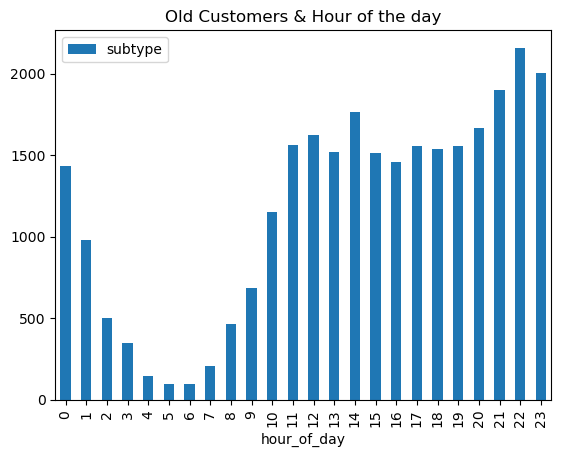

In [87]:
# New customers tend to buy the most at the 22nd hour of the day

old_cust_df[['subtype', 'hour_of_day']].groupby('hour_of_day').count().plot.bar(title='Old Customers & Hour of the day')

# ---------------------------------------Questionnaire----------------------------------------------------

# Top 3 cities as per sales

In [88]:
df.groupby('city')['price'].sum().nlargest(3)

city
Mumbai       5915000
Bengaluru    3850000
New delhi    3457000
Name: price, dtype: int64

# Top categories and types

In [89]:
df.groupby(['cat_type', 'subtype'])['price'].sum().nlargest()

cat_type     subtype      
Apparel      Topwear          23488000
             Bottomwear       10048000
Accessories  Mobile Covers     6601000
             Gift Cards          15000
Name: price, dtype: int64

# Top product names

In [90]:
df.groupby(['prod_name'])['price'].sum().nlargest(3)

prod_name
Men's Printed T-Shirts                 3440000
Men's Printed Full Sleeve T-Shirt      3321000
Women's Printed 3/4 Sleeve T-Shirts    2184000
Name: price, dtype: int64

# Top products

In [91]:
# Top products

df.groupby(['product_type'])['price'].sum().nlargest(3)

product_type
T-Shirts         18385000
Mobile Covers     6601000
Pyjamas           4062000
Name: price, dtype: int64

# ------------------------------------------------------------------------------------------------------------

# Is it fine to launch offers on weekdays or weekends?

<AxesSubplot:title={'center':'Revenue by Days'}, xlabel='day_of_week'>

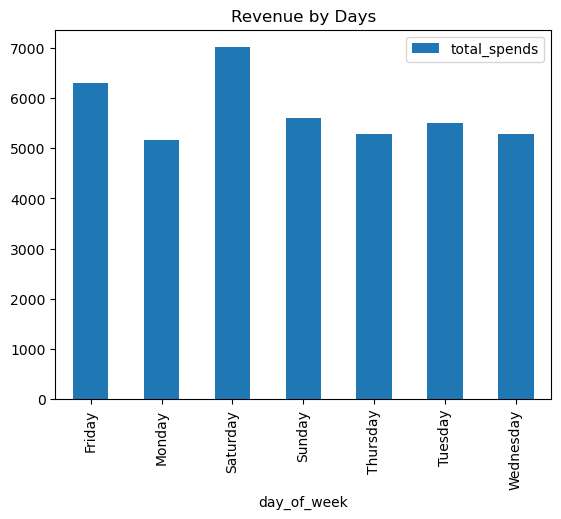

In [92]:
# It is good to launch offers on WEEKENDS as total spends are higher on weekend days.

df[['day_of_week', 'total_spends']].groupby('day_of_week').count().plot.bar(title='Revenue by Days')

# Which day of the month gets them the best sales?

<AxesSubplot:title={'center':'Revenue by Hour'}, xlabel='day_of_month'>

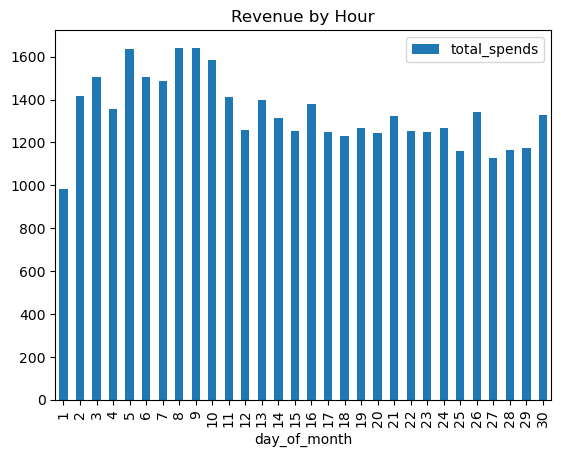

In [93]:
# Best sales are on 5th, 8th or 9th day of the month

df[['day_of_month', 'total_spends']].groupby('day_of_month').count().plot.bar(title='Revenue by Hour')

# At what time of the day their website gets the maximum impressions? (Number of orders)

<AxesSubplot:title={'center':'Revenue by Hour'}, xlabel='hour_of_day'>

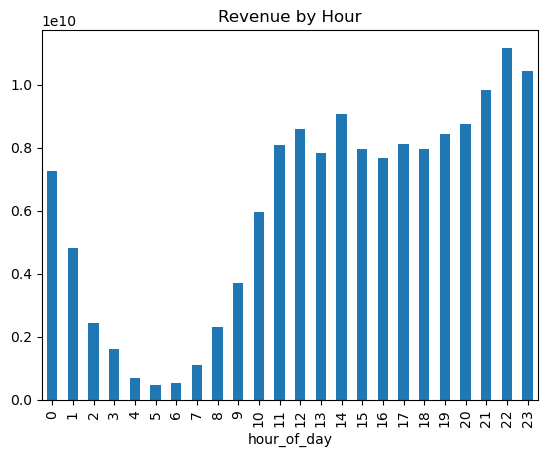

In [94]:
# Here we are calculating it by counting orders per hour
# 22nd hour of the day has the highest number of orders 

df[['hour_of_day', 'order_id']].groupby('hour_of_day')['order_id'].sum().plot.bar(title='Revenue by Hour')

<AxesSubplot:title={'center':'Revenue by Hour'}, xlabel='hour_of_day'>

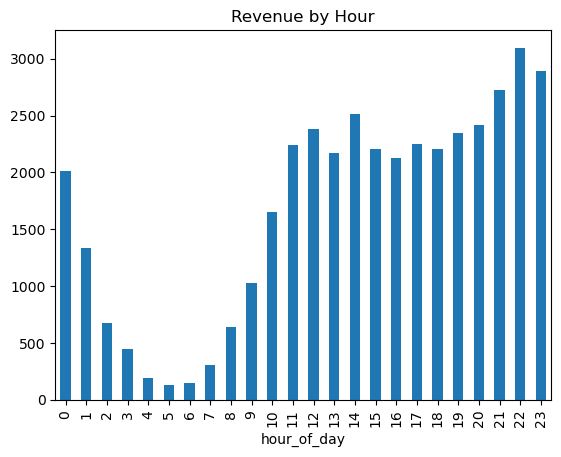

In [95]:
# we can calculate the same based on quantity sold at any hour
# 22nd hour of the day has the highest number of orders (above 3000 quantity)

df[['hour_of_day', 'quantity']].groupby('hour_of_day')['quantity'].sum().plot.bar(title='Revenue by Hour')

data.groupby([pd.Grouper(freq='M'), 'store_type']).agg(total_quantity=('quantity', 'sum'),
                                                       total_amount=('price', 'sum')).head(5)

# Are men placing more orders than women?

<AxesSubplot:title={'center':'Revenue by Gender'}, xlabel='gender'>

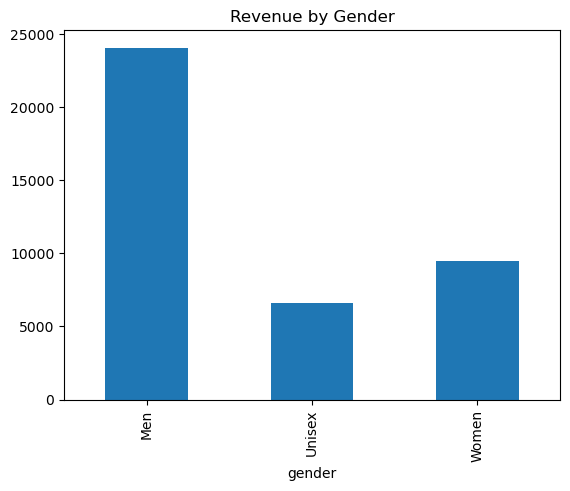

In [96]:
# Thus, we now know that men have placed more orders than women

df.groupby('gender')['quantity'].sum().plot.bar(title='Revenue by Gender')

# ------------------------------------------------------------------------------------------------------

# What are some interesting insights that you can infer from the data?

# Lets check which states have the highest sales

In [97]:
df.groupby(['state'])['price'].sum().nlargest(3)

state
Maharashtra    11833000
Karnataka       4587000
Delhi           3992000
Name: price, dtype: int64

# Revenue by State

<AxesSubplot:title={'center':'Revenue by State'}, xlabel='state'>

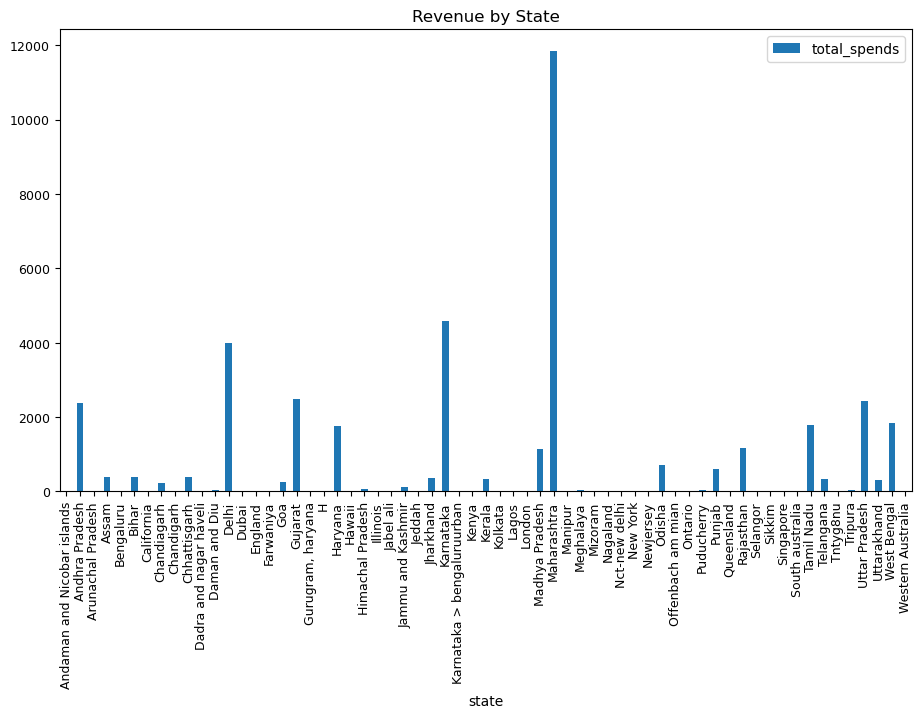

In [98]:
# States with highest sales

df[['state', 'total_spends']].groupby('state').count().plot.bar(title='Revenue by State', fontsize=9, figsize= (11,6))

# Revenue by Country

<AxesSubplot:title={'center':'Revenue by Country'}, xlabel='country'>

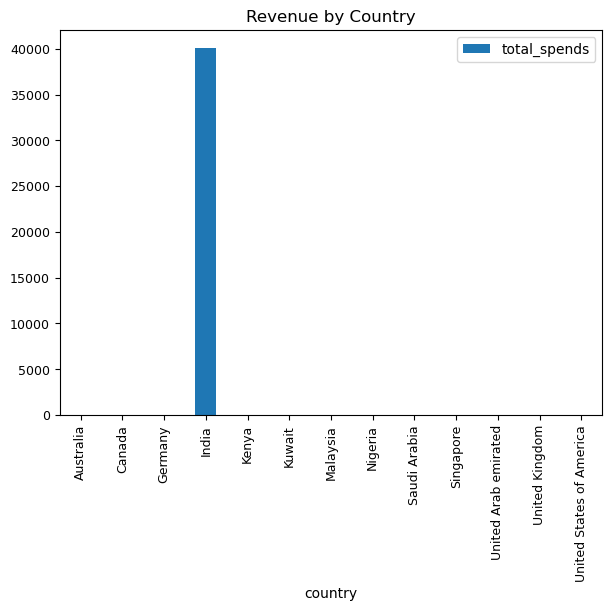

In [99]:
# States with highest sales

df[['country', 'total_spends']].groupby('country').count().plot.bar(title='Revenue by Country', fontsize=9, figsize= (7,5))

# lets check revenue by product type

In [100]:
product_type_revenue = df[['quantity', 'price','product_type']].groupby('product_type').sum().sort_values(ascending=False,by='quantity')
product_type_revenue

,quantity,price
product_type,,
T-Shirts,18385,18385000
Mobile Covers,6601,6601000
Pyjamas,4062,4062000
Boxers,2801,2801000
Joggers,2568,2568000
Vests,2055,2055000
Sweatshirts,1575,1575000
Shorts,617,617000
Zipper,487,487000


<AxesSubplot:title={'center':'Revenue by Product'}, xlabel='product_type', ylabel='price'>

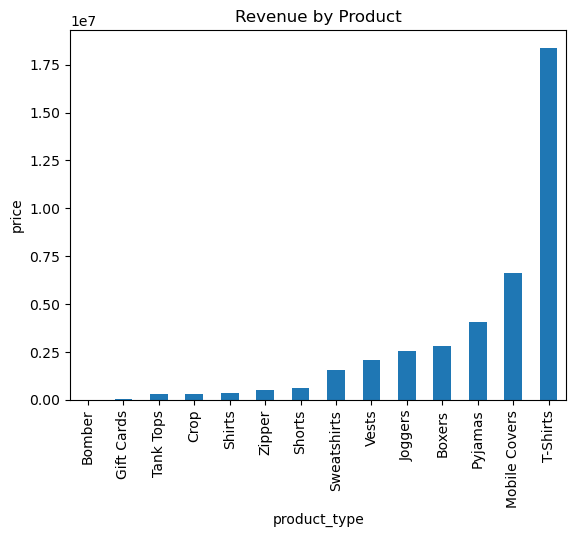

In [101]:
product_type_revenue.groupby(by=['product_type'])['price'].sum().sort_values(ascending=True).plot(kind='bar',ylabel='price',title='Revenue by Product')


# lets check revenue by Category

In [102]:
category_revenue = df[['quantity', 'price','cat_type']].groupby('cat_type').sum().sort_values(ascending=False,by='quantity')
category_revenue

,quantity,price
cat_type,,
Apparel,33536,33536000
Accessories,6616,6616000


<AxesSubplot:title={'center':'Revenue by Category'}, xlabel='cat_type', ylabel='price'>

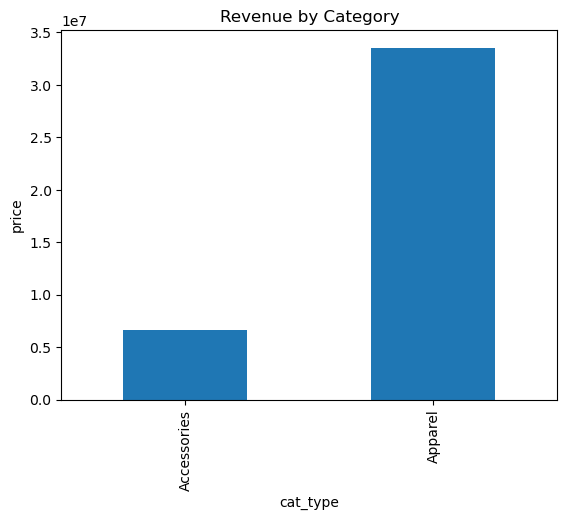

In [103]:
category_revenue.groupby(by=['cat_type'])['price'].sum().sort_values(ascending=True).plot(kind='bar',ylabel='price',title='Revenue by Category')


# lets check revenue by Sub-Category

In [104]:
subcategory_revenue = df[['quantity', 'price','subtype']].groupby('subtype').sum().sort_values(ascending=False,by='quantity')
subcategory_revenue

,quantity,price
subtype,,
Topwear,23488,23488000
Bottomwear,10048,10048000
Mobile Covers,6601,6601000
Gift Cards,15,15000


<AxesSubplot:title={'center':'Revenue by Sub-Category'}, xlabel='subtype', ylabel='price'>

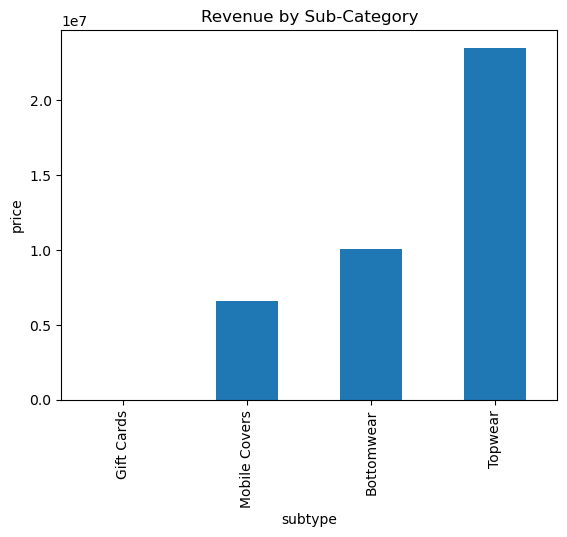

In [105]:
subcategory_revenue.groupby(by=['subtype'])['price'].sum().sort_values(ascending=True).plot(kind='bar',ylabel='price',title='Revenue by Sub-Category')


# Suggest where the company may launch their first offline stores with the product that they may sell at their first offline store

- From the above charts and insights, it clear that we have the highest sales in 'Mumbai' and our hisghest sold product is 'Tshirts'. So, we could open an offline store in Mumbai for our Tshirts (Apparel) category.

- For our online webstore, we should also focus on cities like 'Bangalore' and 'Pune'
  where we have a potential sale already and our top 3 category of focus in apparels should be 'Tshirts', 'pyjamas' and 'boxers'.

# ------------------------------------------------------------------------------------------------------------

# Is it a good idea for the company to open an offline store at this early stage of its startup journey?

Indeed! We should open our first offline store in Mumbai. These would boost our sales 
and also bring confidence for our brand to ours customers.

# ---------------------------------------------------------------------------------------------------------------